<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Supervised-Deep-Learning/blob/main/TensorFlow_2_0_HousingPrice_Regression_1_%5BPractice%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
df = pd.read_csv("/content/drive/MyDrive/Udemy - Complete Tensorflow 2 and Keras Deep learning Bootcamp/TF_2_Notebooks_and_Data/DATA/kc_house_data.csv")

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [16]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


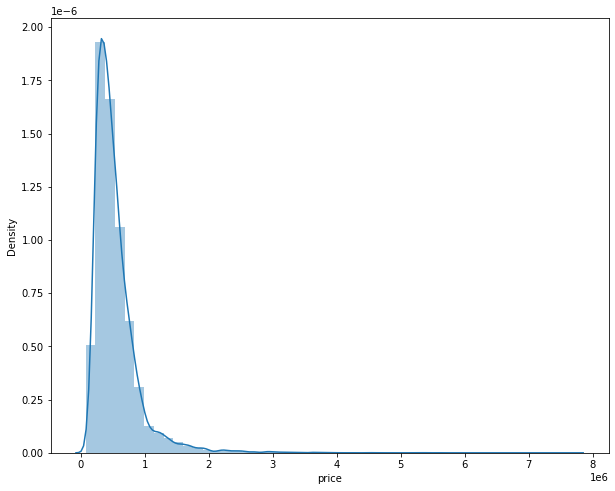

In [23]:
plt.figure(figsize = (10,8))
sns.distplot(df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


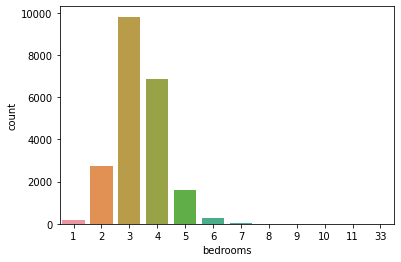

In [24]:
sns.countplot(df['bedrooms'])

In [31]:
df.sort_values(by = 'price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [35]:
one_percent = df['price'].count()*0.005
one_percent

107.985

In [88]:
outliers_removed_df = df.sort_values(by = 'price', ascending=False)[108:]

In [89]:
# 99.5% data
outliers_removed_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3731,1118000110,5/29/2014,2450000.0,4,3.50,4730,13586,1.5,0,0,5,10,4270,460,1935,0,98112,47.6319,-122.288,3710,8828
15008,2210500010,9/30/2014,2450000.0,7,4.25,4670,23115,2.0,0,2,3,11,4670,0,1992,0,98039,47.6183,-122.227,3240,13912
8184,3623500205,5/13/2014,2450000.0,4,4.50,5030,11023,2.0,0,2,3,11,3250,1780,2008,0,98040,47.5722,-122.236,3640,11490
3744,4389201250,5/13/2014,2450000.0,5,4.00,4430,9000,2.0,0,0,3,10,4430,0,2013,0,98004,47.6168,-122.216,2470,9490
1030,5700004028,4/17/2015,2450000.0,4,4.25,4250,6552,2.0,0,3,4,10,2870,1380,2008,0,98144,47.5747,-122.283,3640,8841


In [90]:
outliers_removed_df.sort_values(by = 'price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3731,1118000110,5/29/2014,2450000.0,4,3.50,4730,13586,1.5,0,0,5,10,4270,460,1935,0,98112,47.6319,-122.288,3710,8828
3744,4389201250,5/13/2014,2450000.0,5,4.00,4430,9000,2.0,0,0,3,10,4430,0,2013,0,98004,47.6168,-122.216,2470,9490
1030,5700004028,4/17/2015,2450000.0,4,4.25,4250,6552,2.0,0,3,4,10,2870,1380,2008,0,98144,47.5747,-122.283,3640,8841
15008,2210500010,9/30/2014,2450000.0,7,4.25,4670,23115,2.0,0,2,3,11,4670,0,1992,0,98039,47.6183,-122.227,3240,13912
8184,3623500205,5/13/2014,2450000.0,4,4.50,5030,11023,2.0,0,2,3,11,3250,1780,2008,0,98040,47.5722,-122.236,3640,11490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [91]:
# Convert date field to a datetime datatype
print(type(outliers_removed_df['date'][0]))
outliers_removed_df['date'] = pd.to_datetime(outliers_removed_df['date'])

<class 'str'>


In [92]:
print(type(outliers_removed_df['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [93]:
outliers_removed_df['month'] = outliers_removed_df['date'].apply(lambda date:date.month)
outliers_removed_df['year'] = outliers_removed_df['date'].apply(lambda date:date.year)
outliers_removed_df['day'] = outliers_removed_df['date'].apply(lambda date:date.day)

In [94]:
outliers_removed_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day
3731,1118000110,2014-05-29,2450000.0,4,3.50,4730,13586,1.5,0,0,5,10,4270,460,1935,0,98112,47.6319,-122.288,3710,8828,5,2014,29
15008,2210500010,2014-09-30,2450000.0,7,4.25,4670,23115,2.0,0,2,3,11,4670,0,1992,0,98039,47.6183,-122.227,3240,13912,9,2014,30
8184,3623500205,2014-05-13,2450000.0,4,4.50,5030,11023,2.0,0,2,3,11,3250,1780,2008,0,98040,47.5722,-122.236,3640,11490,5,2014,13
3744,4389201250,2014-05-13,2450000.0,5,4.00,4430,9000,2.0,0,0,3,10,4430,0,2013,0,98004,47.6168,-122.216,2470,9490,5,2014,13
1030,5700004028,2015-04-17,2450000.0,4,4.25,4250,6552,2.0,0,3,4,10,2870,1380,2008,0,98144,47.5747,-122.283,3640,8841,4,2015,17


In [95]:
# Drop date now as we have extracted the useful info out of it
outliers_removed_df = outliers_removed_df.drop('date',axis=1)

In [96]:
# Drop id as it doen't give any useful info
outliers_removed_df = outliers_removed_df.drop("id", axis = 1)

In [97]:
outliers_removed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day
3731,2450000.0,4,3.50,4730,13586,1.5,0,0,5,10,4270,460,1935,0,98112,47.6319,-122.288,3710,8828,5,2014,29
15008,2450000.0,7,4.25,4670,23115,2.0,0,2,3,11,4670,0,1992,0,98039,47.6183,-122.227,3240,13912,9,2014,30
8184,2450000.0,4,4.50,5030,11023,2.0,0,2,3,11,3250,1780,2008,0,98040,47.5722,-122.236,3640,11490,5,2014,13
3744,2450000.0,5,4.00,4430,9000,2.0,0,0,3,10,4430,0,2013,0,98004,47.6168,-122.216,2470,9490,5,2014,13
1030,2450000.0,4,4.25,4250,6552,2.0,0,3,4,10,2870,1380,2008,0,98144,47.5747,-122.283,3640,8841,4,2015,17


In [98]:
# Seperate data and labels
X = outliers_removed_df.drop('price', axis = 1)
y = outliers_removed_df['price']

In [99]:
# Divide the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [100]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17191, 21), (4298, 21), (17191,), (4298,))

In [101]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
# Construct a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [104]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [105]:
# Train the model
model.fit(X_train, y_train, batch_size = 128, epochs = 400, verbose = 2, validation_data = (X_test, y_test))

Epoch 1/400
135/135 - 1s - loss: 368240394240.0000 - val_loss: 390629195776.0000
Epoch 2/400
135/135 - 0s - loss: 366219821056.0000 - val_loss: 383245254656.0000
Epoch 3/400
135/135 - 0s - loss: 337094017024.0000 - val_loss: 314379567104.0000
Epoch 4/400
135/135 - 0s - loss: 210958172160.0000 - val_loss: 135210467328.0000
Epoch 5/400
135/135 - 0s - loss: 82181218304.0000 - val_loss: 77677289472.0000
Epoch 6/400
135/135 - 0s - loss: 67919036416.0000 - val_loss: 75963383808.0000
Epoch 7/400
135/135 - 0s - loss: 66525474816.0000 - val_loss: 74488217600.0000
Epoch 8/400
135/135 - 0s - loss: 65115324416.0000 - val_loss: 72896716800.0000
Epoch 9/400
135/135 - 0s - loss: 63660752896.0000 - val_loss: 71248650240.0000
Epoch 10/400
135/135 - 0s - loss: 62130974720.0000 - val_loss: 69555421184.0000
Epoch 11/400
135/135 - 0s - loss: 60547932160.0000 - val_loss: 67788173312.0000
Epoch 12/400
135/135 - 0s - loss: 58906632192.0000 - val_loss: 66108592128.0000
Epoch 13/400
135/135 - 0s - loss: 5717501

In [107]:
losses = pd.DataFrame(model.history.history)

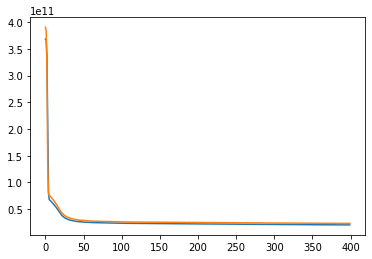

In [112]:
plt.plot(losses)

In [113]:
# Model Evaluation
predictions = model.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [115]:
mse = mean_squared_error(y_test, predictions)
print(mse)

23358265996.10997


In [117]:
mae = mean_absolute_error(y_test, predictions)
print(mae)

97622.382905203


In [128]:
evs = explained_variance_score(y_test, predictions)
print(evs)

0.7732350460479851


In [142]:
# predictions is a 2-D array need to convert to 1-D to plot using sns.scatterplot
predictions = predictions.reshape(-1)
predictions.shape

(4298,)

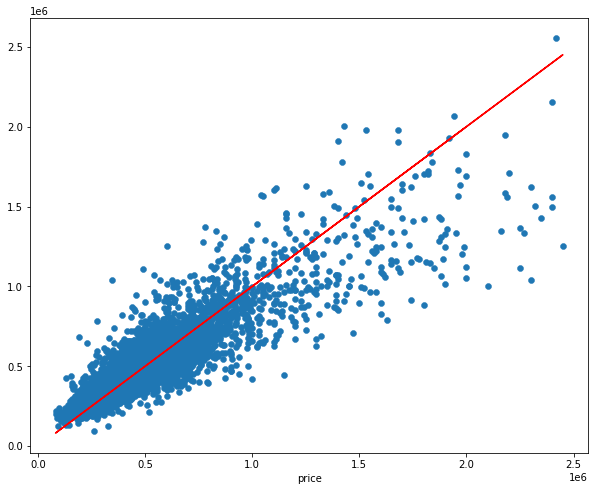

In [143]:
# Plot predictions vs true labels
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = predictions, edgecolor = None)
plt.plot(y_test, y_test, color ='red')

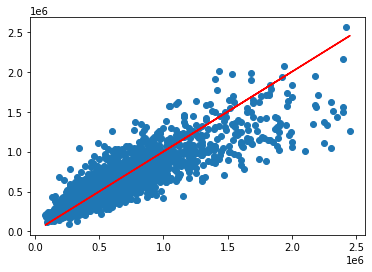

In [144]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [145]:
errors = y_test - predictions

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


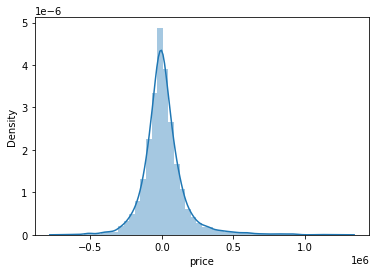

In [147]:
sns.distplot(errors)